In [3]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
import numpy as np
font1 = 20

bm.enable_x64()  # It's better to enable x64 when performing analysis
bm.set_platform('cpu')

bp.__version__

'2.4.6.post5'

In [4]:
class MorrisLecar(bp.DynamicalSystem):
   def __init__(self, neu_type=1, method='rk4'):
      super().__init__()
      # parameters
      self.V_Ca = 120.
      self.g_Ca = 4.
      self.V_K = -84
      self.g_K = 8.
      self.V_leak = -60.
      self.g_leak = 2.
      self.C = 20.
      self.V1 = -1.2
      self.V2 = 18

      if neu_type == 1:
         self.V3 = 12.
         self.V4 = 17.
         self.phi = 2/30
      elif neu_type == 2:
         self.V3 = 2.
         self.V4 = 30
         self.phi = 0.04
      else:
         raise ValueError("type 类型只有 1 或者 2")

      # variables
      self.V = bm.Variable(-40 * bm.ones(1))
      self.W = bm.Variable(bm.zeros(1))
      self.Iext = bm.Variable(bm.zeros(1))

      self.int_V = bp.odeint(self.dV, method=method)
      self.int_W = bp.odeint(self.dW, method=method)

      # functions
   def dV(self,V, t, W, Iext=0.):
      M_inf = (1 / 2) * (1 + bm.tanh((V - self.V1) / self.V2))
      I_Ca = self.g_Ca * M_inf * (V - self.V_Ca)
      I_K = self.g_K * W * (V - self.V_K)
      I_Leak = self.g_leak * (V - self.V_leak)
      dVdt = (- I_Ca - I_K - I_Leak + Iext) / self.C
      return dVdt

   def dW(self, W, t, V):
      tau_W = 1 / (self.phi * bm.cosh((V - self.V3) / (2 * self.V4)))
      W_inf = (1 / 2) * (1 + bm.tanh((V - self.V3) / self.V4))
      dWdt = (W_inf - W) / tau_W
      return dWdt

   def update(self):
      t, dt = bp.share['t'], bp.share['dt']
      self.V.value = self.int_V(self.V, t, self.W, self.Iext, dt)
      self.W.value = self.int_W(self.W, t, self.V, dt)
      self.Iext[:] = 0.


## Phase plane analysis

Phase plane analysis is one of the most important techniques for studying the behavior of nonlinear systems, since there is usually no analytical solution for a nonlinear system. BrainPy can help users to plot phase plane of 1D systems or 2D systems. Specifically, we provide [brainpy.analysis.PhasePlane1D](../apis/auto/analysis/generated/brainpy.analysis.lowdim.PhasePlane1D.rst) and [brainpy.analysis.PhasePlane2D](../apis/auto/analysis/generated/brainpy.analysis.lowdim.PhasePlane2D.rst). It can help to plot:

- **Nullcline**: The zero-growth isoclines, such as $g(x, y)=0$ and $g(x, y)=0$.
- **Fixed points**: The equilibrium points of the system, which are located at all the nullclines intersect.
- **Vector field**: The vector field of the system.
- **Limit cycles**: The limit cycles.
- **Trajectories**: A simulation trajectory with the given initial values.

Now we focus on ``brainpy.analysis.PhasePlane2D`` by using a well-known neuron model Morris-Lecar model. 

# Type I neuron

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 626 candidates
I am trying to filter out duplicate fixed points ...
	Found 6 fixed points.
	#1 V=-13.254944321327892, W=0.04800000687131936 is a saddle node.
	#2 V=-13.168422817187182, W=0.04900000000000021 is a saddle node.
	#3 V=-13.082242651884988, W=0.05000000000000021 is a saddle node.
	#4 V=-12.996397281962143, W=0.050999992526061876 is a saddle node.
	#5 V=2.1424623322618426, W=0.23900000000000038 is a unstable focus.
	#6 V=2.2511436455349663, W=0.2400000042575476 is a unstable focus.
I am plotting the trajectory ...
I am plotting the trajectory ...


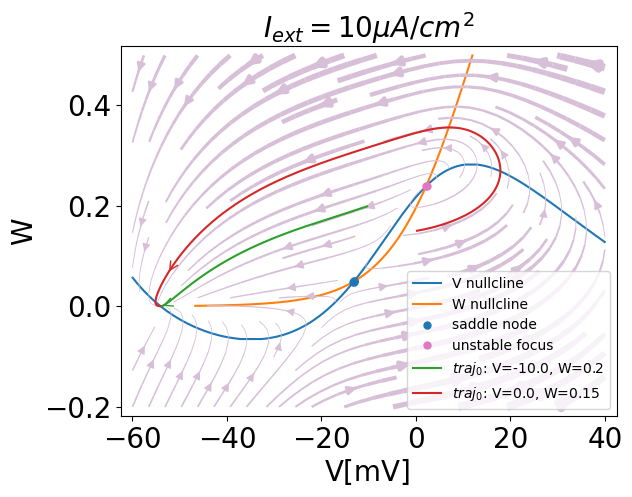

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 681 candidates
I am trying to filter out duplicate fixed points ...
	Found 5 fixed points.
	#1 V=-28.12194368642994, W=0.008000023542856925 is a saddle node.
	#2 V=-27.568326812106967, W=0.009000011401176162 is a saddle node.
	#3 V=-27.088062451525385, W=0.010000000000000175 is a saddle node.
	#4 V=-26.65871341668379, W=0.010999986931170758 is a saddle node.
	#5 V=4.789583501564888, W=0.30099999555125867 is a unstable focus.
I am plotting the trajectory ...
I am plotting the trajectory ...


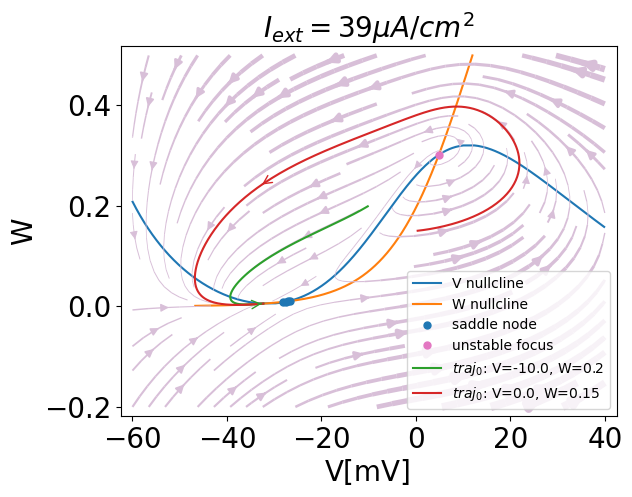

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 683 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 V=4.885466813926383, W=0.30300000000000044 is a unstable focus.
I am plotting the trajectory ...
I am plotting the trajectory ...


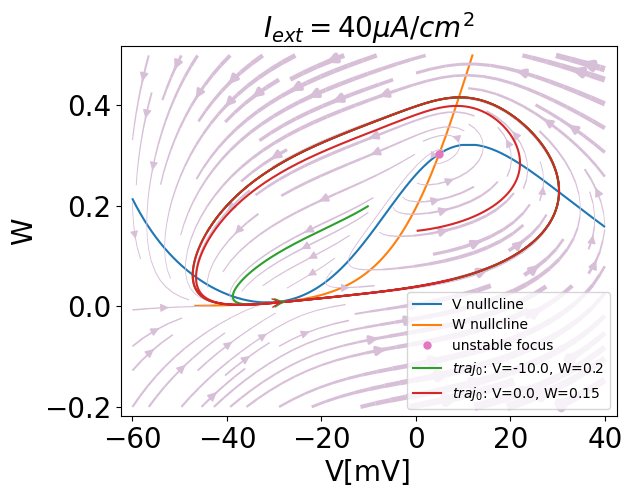

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 705 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 V=5.586011561934256, W=0.3209999957767465 is a unstable focus.
I am plotting the trajectory ...
I am plotting the trajectory ...


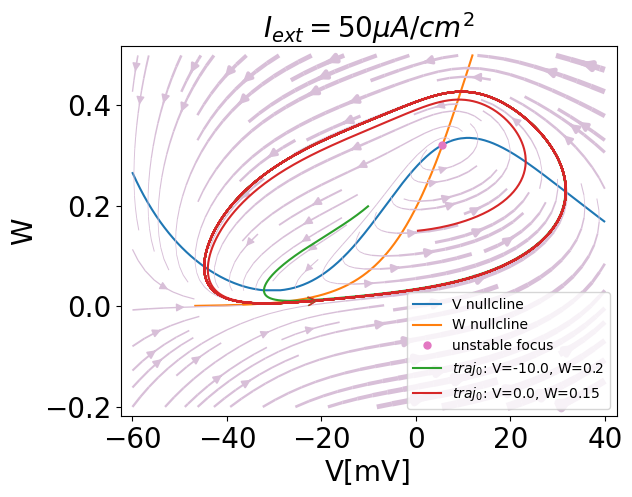

In [5]:
I_ext = [10,39,40,50]
# I_ext = [40]
for I_app in I_ext:
  model = MorrisLecar()
  pp = bp.analysis.PhasePlane2D(
    model,
    target_vars={'V': [-60, 40], 'W': [-0.2, 0.5]},
    pars_update={'Iext': I_app}, 
    resolutions={'V': 0.005, 'W': 0.001},
  )
  # plt.figure(figsize= (6,6))
  pp.plot_nullcline(x_style={'fmt': '-'}, y_style={'fmt': '-'})
  # Vector field can plotted as two ways:
  # - plot_method="streamplot" (default)
  # - plot_method="quiver"
  pp.plot_vector_field()

  # There are many ways to search fixed points. 
  # By default, it will use the nullcline points of the first 
  # variable ("V") as the initial points to perform fixed point searching
  pp.plot_fixed_point()

  # Trajectory plotting receives the setting of the initial points.
  # There may be multiple trajectories, therefore the initial points 
  # should be provived as a list/tuple/numpy.ndarray/Array
  pp.plot_trajectory({'V': [-10], 'W': [0.2]}, duration=600.)
  pp.plot_trajectory({'V': [0], 'W': [0.15]}, duration=600.)


  font1 = 20

  plt.xlabel("V[mV]",fontsize= font1)
  plt.ylabel("W",fontsize= font1)
  plt.xticks(np.arange(-60,60,20),fontsize=font1)
  plt.yticks(np.arange(-0.2,0.6,0.2),fontsize=font1)
  plt.title(r"$I_{ext}$"+ r"$= {} \mu A/cm^2$".format(I_app),fontsize=font1)
  # plt.savefig('figure/pp_current_{}.png'.format(I_app),bbox_inches="tight")
  # show the phase plane figure
  pp.show_figure()


  0%|          | 0/10000 [00:00<?, ?it/s]

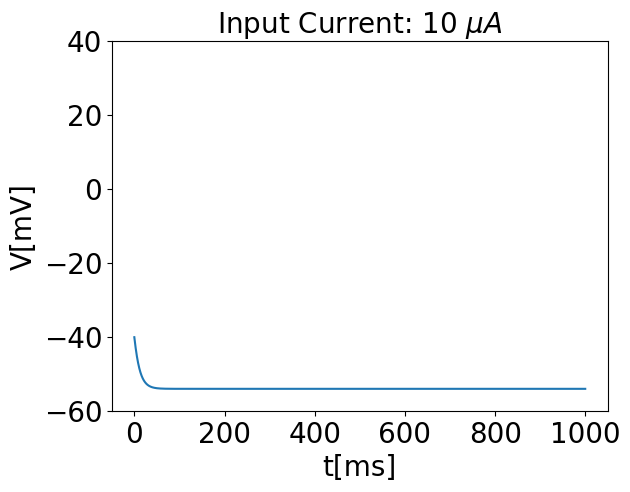

  0%|          | 0/10000 [00:00<?, ?it/s]

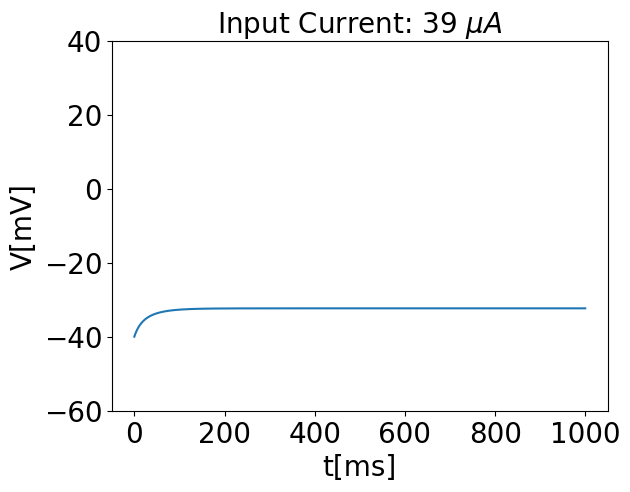

  0%|          | 0/10000 [00:00<?, ?it/s]

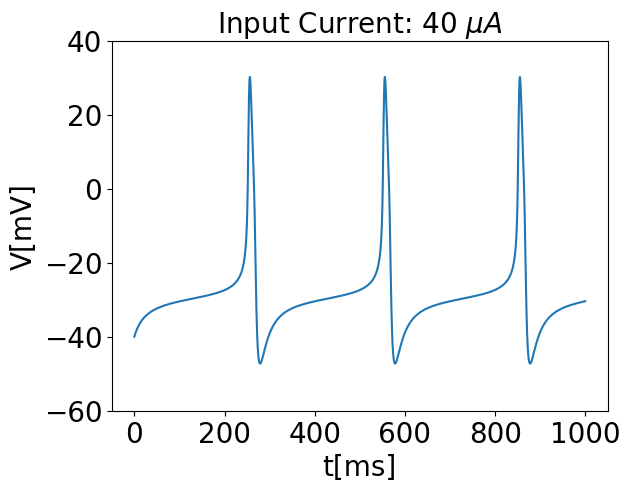

  0%|          | 0/10000 [00:00<?, ?it/s]

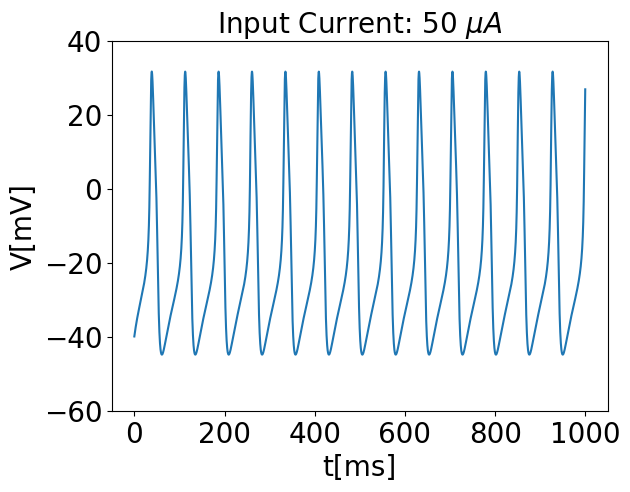

In [6]:
I_ext = [10,39,40,50]
# I_ext = [40]
for I_app in I_ext:
    model = MorrisLecar()
    runner = bp.DSRunner(model, monitors=['V', 'W'], inputs=['Iext', I_app])
    runner.run(1000.)
    plt.plot(runner.mon.ts, runner.mon.V)
    plt.xlabel("t[ms]",fontsize= font1)
    plt.ylabel("V[mV]",fontsize= font1)
    plt.xticks(np.arange(0,1020,200),fontsize=font1)
    plt.yticks(np.arange(-60,42,20),fontsize=font1)
    plt.title(f"Input Current: {I_app} $\mu A$", fontsize=font1)  # Add the title
    # plt.savefig("figure/trace_I_{}.png".format(I_app),bbox_inches="tight")
    plt.show()

# Type II excitable neuron

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 1708 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 V=-37.2887922616689, W=0.069 is a stable focus.
	#2 V=-37.15421704136104, W=0.0685 is a stable focus.
	#3 V=-37.017293265749835, W=0.068 is a stable focus.
I am plotting the trajectory ...


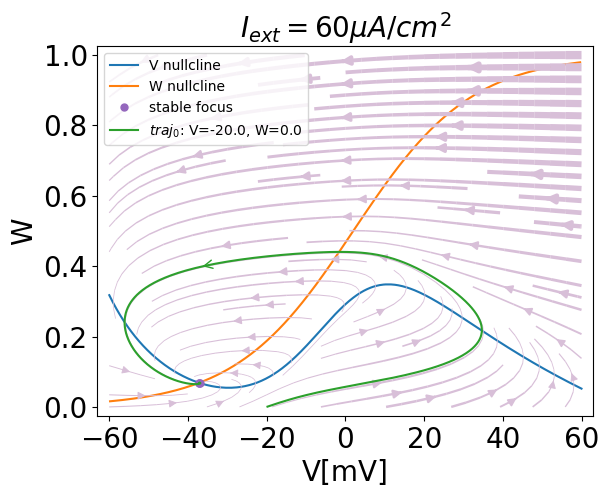

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2238 candidates
I am trying to filter out duplicate fixed points ...
	Found 17 fixed points.
	#1 V=-4.166504077021227, W=0.401 is a unstable node.
	#2 V=-4.117702635021813, W=0.4015 is a unstable node.
	#3 V=-4.06885002207347, W=0.402 is a unstable node.
	#4 V=-4.019944699676574, W=0.4025 is a unstable node.
	#5 V=-3.9709851142069357, W=0.403 is a unstable node.
	#6 V=-3.9219696964374506, W=0.4035 is a unstable node.
	#7 V=-3.8728968610481074, W=0.404 is a unstable node.
	#8 V=-3.823765006123657, W=0.4045 is a unstable node.
	#9 V=-3.774572512638796, W=0.405 is a unstable node.
	#10 V=-3.725317743930046, W=0.4055 is a unstable node.
	#11 V=-3.67599904515412, W=0.406 is a unstable node.
	#12 V=-3.62

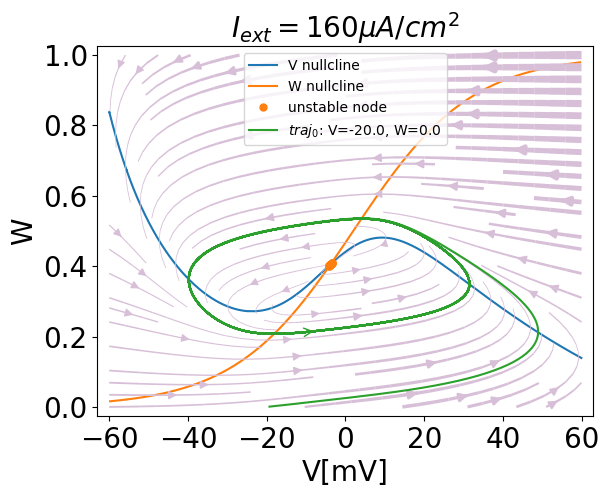

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating the vector field ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2124 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 V=8.9200864751324, W=0.6155 is a stable focus.
I am plotting the trajectory ...


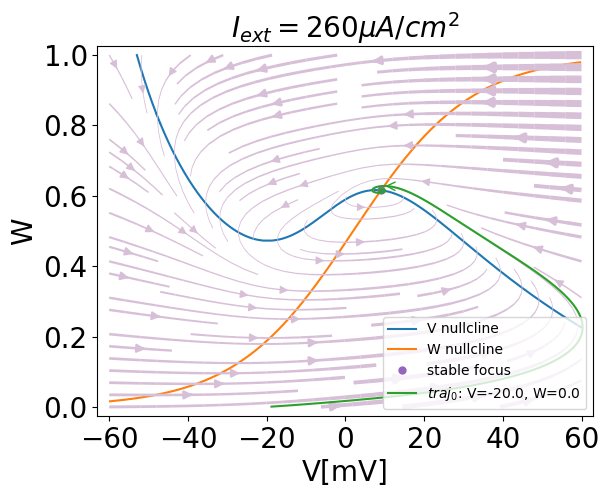

In [7]:
I_ext = [60,160,260]
# I_ext = [40]
for I_app in I_ext:
  model_typeII = MorrisLecar(neu_type=2)
  pp = bp.analysis.PhasePlane2D(
    model_typeII,
    target_vars={'V': [-60, 60], 'W': [0., 1.]},
    pars_update={'Iext': I_app}, 
    resolutions={'V': 0.02, 'W': 0.0005},
  )
  # plt.figure(figsize= (6,6))
  pp.plot_nullcline(x_style={'fmt': '-'}, y_style={'fmt': '-'})
  # Vector field can plotted as two ways:
  # - plot_method="streamplot" (default)
  # - plot_method="quiver"
  pp.plot_vector_field()

  # There are many ways to search fixed points. 
  # By default, it will use the nullcline points of the first 
  # variable ("V") as the initial points to perform fixed point searching
  pp.plot_fixed_point()

  # Trajectory plotting receives the setting of the initial points.
  # There may be multiple trajectories, therefore the initial points 
  # should be provived as a list/tuple/numpy.ndarray/Array
  pp.plot_trajectory({'V': [-20], 'W': [0.]}, duration=600.)
  # pp.plot_trajectory({'V': [0], 'W': [0.15]}, duration=600.)


  font1 = 20

  plt.xlabel("V[mV]",fontsize= font1)
  plt.ylabel("W",fontsize= font1)
  plt.xticks(np.arange(-60,61,20),fontsize=font1)
  plt.yticks(np.arange(0.,1.01,0.2),fontsize=font1)
  plt.title(r"$I_{ext}$"+ r"$= {} \mu A/cm^2$".format(I_app),fontsize=font1)
  # plt.savefig('figure/pp_current2_{}.png'.format(I_app),bbox_inches="tight")
  # show the phase plane figure
  pp.show_figure()

  0%|          | 0/10000 [00:00<?, ?it/s]

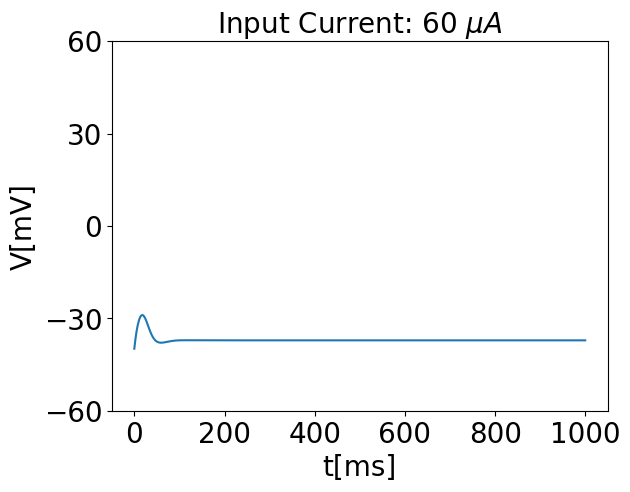

  0%|          | 0/10000 [00:00<?, ?it/s]

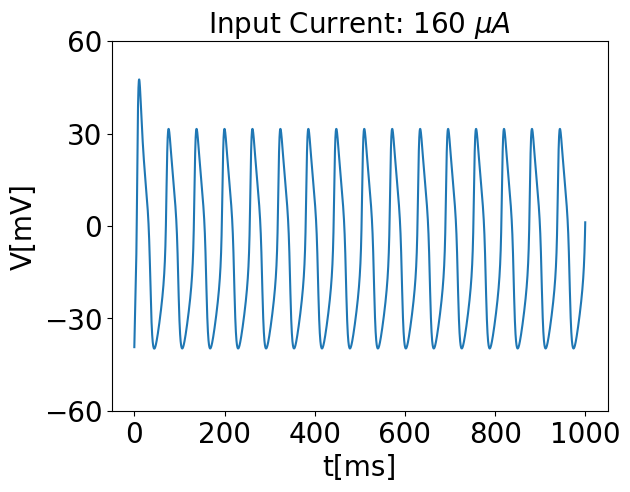

  0%|          | 0/10000 [00:00<?, ?it/s]

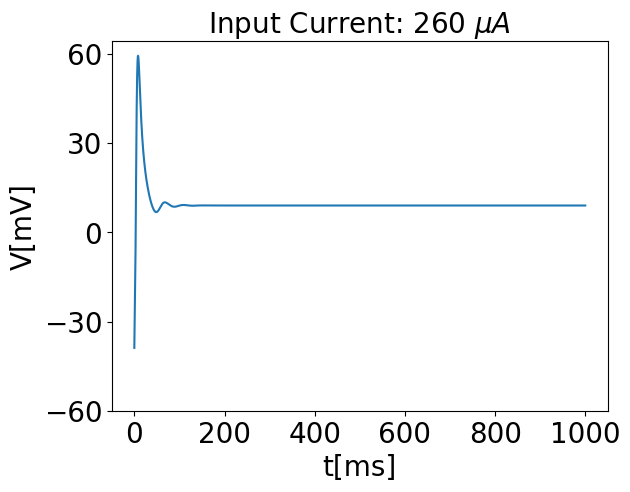

In [8]:

for I_app in I_ext:
    model_typeII = MorrisLecar(neu_type=2)
    runner = bp.DSRunner(model_typeII, monitors=['V', 'W'], inputs=['Iext', I_app])
    runner.run(1000.)
    plt.plot(runner.mon.ts, runner.mon.V)
    plt.xlabel("t[ms]",fontsize= font1)
    plt.ylabel("V[mV]",fontsize= font1)
    plt.xticks(np.arange(0,1020,200),fontsize=font1)
    plt.yticks(np.arange(-60,62,30),fontsize=font1)
    plt.title(f"Input Current: {I_app} $\mu A$", fontsize=font1)
    # plt.savefig("figure/trace_II_{}.png".format(I_app),bbox_inches="tight")
    plt.show()

### Generate gain curves ($F-I$) to visualize the responses of these two types of neurons.

In [7]:
class MorrisLecar(bp.NeuGroup):
   def __init__(self, size, neu_type=1, method='exp_auto', **kwargs):
      super().__init__(size=size, **kwargs)
      # parameters
      self.V_Ca = 120.
      self.g_Ca = 4.
      self.V_K = -84
      self.g_K = 8.
      self.V_leak = -60.
      self.g_leak = 2.
      self.C = 20.
      self.V1 = -1.2
      self.V2 = 18
      self.V_th = -15

      if neu_type == 1:
         self.V3 = 12.
         self.V4 = 17.
         self.phi = 2/30
      elif neu_type == 2:
         self.V3 = 2.
         self.V4 = 30
         self.phi = 0.04
      else:
         raise ValueError("type 类型只有 1 或者 2")

      # variables
      self.V = bm.Variable(-40 * bm.ones(self.num))
      self.W = bm.Variable(bm.zeros(self.num))
      self.Iext = bm.Variable(bm.zeros(self.num))
      self.spike = bm.Variable(bm.zeros(self.num, dtype=bool))

      self.int_V = bp.odeint(self.dV, method=method)
      self.int_W = bp.odeint(self.dW, method=method)

      # functions
   def dV(self,V, t, W, Iext=0.):
      M_inf = (1 / 2) * (1 + bm.tanh((V - self.V1) / self.V2))
      I_Ca = self.g_Ca * M_inf * (V - self.V_Ca)
      I_K = self.g_K * W * (V - self.V_K)
      I_Leak = self.g_leak * (V - self.V_leak)
      dVdt = (- I_Ca - I_K - I_Leak + Iext) / self.C
      return dVdt

   def dW(self, W, t, V):
      tau_W = 1 / (self.phi * bm.cosh((V - self.V3) / (2 * self.V4)))
      W_inf = (1 / 2) * (1 + bm.tanh((V - self.V3) / self.V4))
      dWdt = (W_inf - W) / tau_W
      return dWdt

   def update(self):
      t, dt = bp.share['t'], bp.share['dt']
      V = self.int_V(self.V, t, self.W, self.Iext, dt)
      self.W.value = self.int_W(self.W, t, self.V, dt)
      self.spike.value = bm.logical_and(self.V < self.V_th, V >= self.V_th)
      self.V.value = V
      self.Iext[:] = 0.